<a href="https://colab.research.google.com/github/Nov05/Google-Colaboratory/blob/master/20221012_Kaggle_FB3_ELL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

created by nov05 on 2022-10-12   

# **\<BEGIN\>**  

* [**Kaggle Competition**](https://www.kaggle.com/competitions/feedback-prize-english-language-learning)  
* [**data folder**](https://drive.google.com/drive/folders/1kTRRz7GPNXAjWYxAD0xXUgZrGh79AeRg)   
* [**Steps to submit solution to a "Notebook-only Compeititon"**](https://www.kaggle.com/general/166755) Posted in General 2 years ago   


In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.metrics import mean_squared_error

url_train = 'https://drive.google.com/uc?id=1qa31ST7FgmgcaZaEwu3K2AKyu_8AnHZL'
url_test = 'https://drive.google.com/uc?id=1KmhuKX_0ilDhhkANzupapT4l9SH4DHCD'
url_submission = 'https://drive.google.com/uc?id=1LXITrcbWR51Ej2nyMxI5UpqLA5kq1hJ0'

# **column means as baseline**    
columnwise root mean squared error (CRMSE)  
public score 0.61, rank 1323/1407.  
The best public score is 0.43 for now.  

In [6]:
data = pd.read_csv(url_train)
print(data.shape)
data.head()

(3911, 8)


,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [ ]:
data.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
## columnwise root mean squared error (CRMSE)
## tensorflow or numpy version https://www.kaggle.com/competitions/feedback-prize-english-language-learning/discussion/348985
nrow = data.shape[0]
cols = data.columns.tolist()[2:]
print('cols:\t', cols)
ncol = len(cols)
ndec = 4 # decimal

means = data.describe().iloc[[1]].values[0]
print('mean:\t', np.round(means, ndec))
mses = [mean_squared_error(data[c], [m]*nrow) for c,m in zip(cols,means)]
print('mse:\t', np.round(mses, ndec))
crmse = np.mean([np.sqrt(mean_squared_error(data[c], [m]*nrow)) for c,m in zip(cols,means)])
print('crmse:\t ', np.round(crmse, ndec))

cols:	 ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
mean:	 [3.1271 3.0283 3.2357 3.1168 3.0329 3.0811]
mse:	 [0.4389 0.4151 0.34   0.4302 0.4897 0.4507]
crmse:	  0.6528


In [ ]:
## read test csv
test = pd.read_csv(url_test)
print(test.shape)
test.head()

(3, 2)


,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [ ]:
## read submission csv
submission = pd.read_csv(url_submission)
submission.head()

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.0,3.0,3.0,3.0,3.0,3.0
1,000BAD50D026,3.0,3.0,3.0,3.0,3.0,3.0
2,00367BB2546B,3.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
## fill submission csv
submission = test[['text_id']]
print(submission.shape)
submission.head()

(3, 1)


,text_id
0,0000C359D63E
1,000BAD50D026
2,00367BB2546B


# **data exploratory analysis**  

[EDA results from Kaggle](https://www.kaggle.com/competitions/feedback-prize-english-language-learning/discussion?search=eda)   

In [ ]:
## there are 6 categories
data.columns

Index(['text_id', 'full_text', 'cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions'],
      dtype='object')

In [ ]:
## length could be a feature
lens = data['full_text'].map(len)
print(min(lens), max(lens), np.mean(lens).round(2))

82 6044 2334.52


In [ ]:
## add the total and average score columns
data['total'] = data.iloc[:,2:8].sum(axis=1)
data['average'] = data.iloc[:,8] / 6.
data.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,total,average
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,20.0,3.333333
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,14.5,2.416667
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,18.0,3.000000
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,27.0,4.500000
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,16.5,2.750000


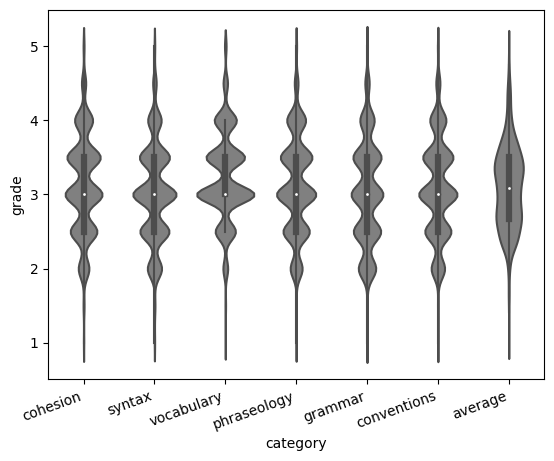

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tmp = pd.melt(data, value_vars=data.columns[[2,3,4,5,6,7,9]])\
        .rename(columns={'variable':'category', 'value':'grade'})
g = sns.violinplot(data=tmp, x='category', y='grade',
                   color='gray')
g.set_xticklabels(g.get_xticklabels(), rotation=20, horizontalalignment='right')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

def get_word_count(text):
    tokens = word_tokenize(text, language='english', preserve_line=False)
    return len(tokens)

data['word_count'] = data['full_text'].map(get_word_count)
data[['full_text','word_count']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,full_text,word_count
0,I think that students would benefit from learn...,283
1,When a problem is a change you have to let it ...,554
2,"Dear, Principal\n\nIf u change the school poli...",356
3,The best time in life is when you become yours...,836
4,Small act of kindness can impact in other peop...,237


In [ ]:
def get_sentence_count(text):
    tokens = sent_tokenize(text, language='english')
    return len(tokens)

data['sentence_count'] = data['full_text'].map(get_sentence_count)
data[['full_text','sentence_count']].head()

,full_text,sentence_count
0,I think that students would benefit from learn...,18
1,When a problem is a change you have to let it ...,14
2,"Dear, Principal\n\nIf u change the school poli...",19
3,The best time in life is when you become yours...,36
4,Small act of kindness can impact in other peop...,3


In [ ]:
data['sentence_length'] = data['word_count'] / data['sentence_count']
data[['full_text','sentence_length', 'average']].head()

,full_text,sentence_length,average
0,I think that students would benefit from learn...,15.722222,3.333333
1,When a problem is a change you have to let it ...,39.571429,2.416667
2,"Dear, Principal\n\nIf u change the school poli...",18.736842,3.000000
3,The best time in life is when you become yours...,23.222222,4.500000
4,Small act of kindness can impact in other peop...,79.000000,2.750000


## **Pearson correlation coefficient**  

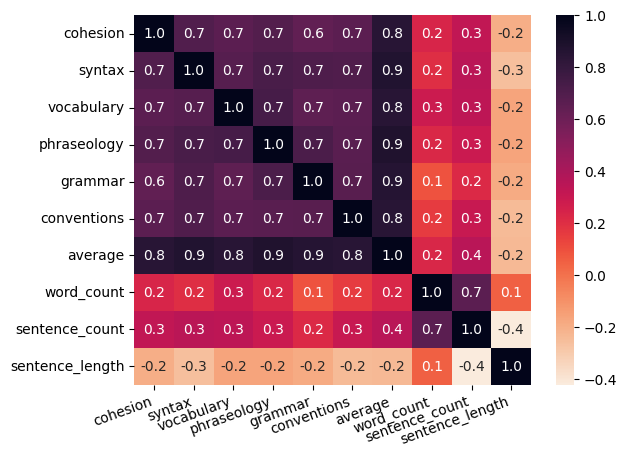

In [ ]:
import seaborn as sns
g = sns.heatmap(data.iloc[:,[2,3,4,5,6,7,9,10,11,12]].corr(), ## Pearson correlation coefficient
                annot=True, fmt=".1f", cmap=sns.cm.rocket_r)
g.set_xticklabels(g.get_xticklabels(), rotation=20, horizontalalignment='right');
## It is clear that there is no negative correlation between components as expected.
## There is very low correlation between word and sentence counts to their proficiency scores.
## Suppose Quality > Quantity.

## **exam highest and lowest texts**  

In [44]:
data_sorted = data.sum(axis=1).sort_values()
lowest = data.iloc[data_sorted[:5].index,:]
lowest

<ipython-input-44-1064dff0b696>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_sorted = data.sum(axis=1).sort_values()


,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
1540,767533E12569,he is a good because they are the prescient an...,1.0,1.0,1.0,1.0,1.0,1.0
952,48EA282A4EAF,some student offer distance learning as an opt...,1.0,1.0,1.0,1.0,1.0,1.0
3086,DB2EA5C4828F,"Technology is positive, because is the good po...",1.0,1.0,1.5,1.0,1.0,1.0
3679,F69C85F4C3CA,the memorable teacher ever had\r\n\r\nwas a te...,1.0,1.0,1.5,1.0,1.0,1.5
514,2716F5E20A4F,"The students be required to take music ,drama ...",1.5,1.0,1.5,1.0,1.0,1.5


🔴 observe the texts with the lowest scores. we might find the following problems.     
* missing capitalization of the first letter of the first word of many sentences. (well, mine too. :-P)    
* wrong spellings, e.g. some "the" actually should be "there"
* missing or wrong punctuations
* wrong punctuation positions  
* grammar issues
* non-english words  
* limited vocabulary  
* too short

In [45]:
for text in lowest.full_text:
    print(text)
    print('\n', '-'*150, '\n')

he is a good because they are the prescient and us. now the are more procession a other prescient and us. because and the more many education for student and school. the more school for one because he have a one women the have many education for a other because the good more the one is information for access because is not like the brazen giant of Greek fame with conquering one nation for is the imprison the eyes command the one book for people the us give more your lied your huddled Farmer with silent lips the more the one is for you because the are a one solution for you and a other people he have a more the one solution for you here ancient lands your storied pound Aries she with silent lips pledge of a in order people he have a education

Do we accomplish more the if we are always doing something or does inactivity also serve a purpose take a position on this for you and specific examples. take a position for you because the are a never much may be a always how many I planned and m

In [46]:
highest = data.iloc[data_sorted[-5:].index,:]
highest

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
1765,85C54BD4D416,"Thomas Jefferson, writer of the Declaration of...",4.5,5.0,5.0,4.5,5.0,5.0
1060,5132328226C2,Afterschool Homework Club\n\nMost students do ...,5.0,5.0,5.0,5.0,4.5,4.5
258,12E3D52345C6,Technology has always acted as a compelling an...,5.0,5.0,5.0,5.0,4.5,5.0
1082,52DC3B7C3952,Working From Home\n\nShould students be allowe...,5.0,5.0,4.5,5.0,5.0,5.0
2389,B1AFACE6704E,I agree with Michelangelo's statement as I hav...,5.0,5.0,5.0,5.0,5.0,5.0


🔴 as for the texts with the highest scores, there are over all less problems, and they are more expressive, which is a quality that is hard to quantify.  

In [47]:
for text in highest.full_text:
    print(text)
    print('\n', '-'*150, '\n')

Thomas Jefferson, writer of the Declaration of Independence and founding father of the United States, once said, "Determine never to be idle...it is wonderful how much may be done if we are always doing." In Jefferson's eyes, a world spent in constant work and motion represents a more productive and accomplished world. However, there is merit in a world that does not work without break and resolves to be idle at times. A world that is always working may also be a world that is burning out, diminishing the value of building connections and reflecting. A world that is idle when it recognizes its need to be has more value than a world that is always working, as it allows time for cognitive development and reflection, mental health, and inspiration.

In the body, the brain represents an entity that is constantly developing, creating new ideas, and planning for the future. If a human was always working, there would be no time to create new ideas or plan. The potential of the human brain wou

## **PCA on grades**   

👉 my colab notebook, [DS_Sprint_Challenge_5_Linear_Models.ipynb](https://colab.research.google.com/drive/1z_SVwevyG0wAjV2FBVNZN9fd1C9hsHOa?#scrollTo=Kvy4Z0xv7eJF)    

https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html  
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html     
https://www.jcchouinard.com/pca-with-python/  


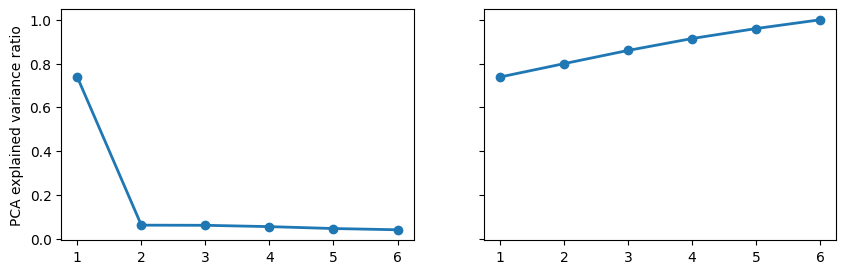

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train = data.iloc[:,2:8]
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])
pipeline.fit(X_train)
fig, ax = plt.subplots(ncols=2, figsize=(10, 3), sharey=True)
ax[0].plot(
    np.arange(1, pipeline['pca'].n_components_ + 1),
    pipeline['pca'].explained_variance_ratio_,
    "o-", linewidth=2
)
ax[0].set_ylabel("PCA explained variance ratio")
ax[1].plot(
    np.arange(1, pipeline['pca'].n_components_ + 1),
    np.cumsum(pipeline['pca'].explained_variance_ratio_),
    "o-", linewidth=2
);

## 🔴 **conclusion**    

* The target variables, these 6 English scores, are very highly correlated. The Pearson correlation coefficients between target variables are typically between ~0.64 and 0.74. Another way to look at it is by performing a PCA on the target variable. The first component accounts for 73.9% of the variance, while the other components are relatively evenly distributed, ranging from 3.7% to 6.6%. So it is likely that a few relevant features would do most of the work.  

* Looking at the lowest and highest scores is useful to find feature ideas:
 * Many students with low scores used sms like english and used many contractions
 * High scores essay tend to be longer, and have more structure (paragraphs)
 * Some students used other languages than English. They might have recently immigrated and just started learning English, which is really hard, but since these essays are rated for English quality, they usually get lower scores.
 * Some students systematically put a whitespace before periods not after, for instance "My sentence just ended .Then it started again ."

 ---  
 ---  

# **code example snippets (not related)**

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


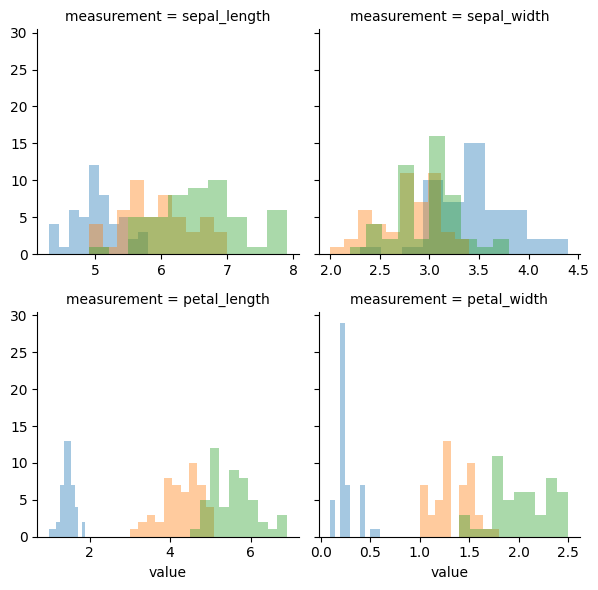

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")
display(iris.head())
iris_long = pd.melt(iris, "species", var_name="measurement")
display(iris_long.head())
g = sns.FacetGrid(iris_long, hue="species", col="measurement", col_wrap=2, sharex=False)
g.map(plt.hist, "value", alpha=.4)

<ipython-input-45-c2ceb7b93416>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")


Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3


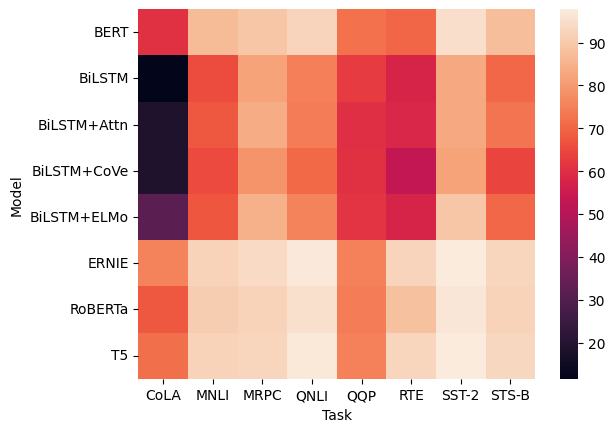

In [ ]:
import seaborn as sns
glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")
display(glue.head())
sns.heatmap(glue);

# **\<END\>**  